In [112]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
from warnings import filterwarnings
filterwarnings("ignore")

2x1-x2-x3=1   
3x1-4x2+x3=2  
x1-x2-x3=3   

2x1-x2-x3-1=0  
3x1-4x2+x3-2=0  
x1-x2-x3-3=0  

x1 = 3x1-x2-x3-1  
x2 = 3x1-3x2+x3-2  
x3 = x1-x2-3  

3*x1-1*x2-1*x3-1 = 0 - 0 -0 - 1 = -1     
3*x1-3*x2+1*x3-2 = 0 - 0 + 0 -2 = -2     
1*x1-1*x2-3 = 0 -0 -3 =           -3    

-4.64*x1 + 1.13*x2 -8.88*x3 + 3.75 = 0   
7.61*x1 + 6.25*x2 - 2.32*x3 - 2.33 = 0   
-9.11*x1 +1.02*x2 - 0.73*x3 + 1.2 = 0   

-3.64*x1 + 1.13*x2 -8.88*x3 + 3.75 = x1   
7.61*x1 + 7.25*x2 - 2.32*x3 - 2.33 = x2   
-9.11*x1 +1.02*x2 + 0.27*x3 + 1.2 = x3   

In [119]:
eps = 1e-2

A = np.array([
    [-4.64, 1.13, -8.88],
    [7.61, 6.25, -2.32],
    [-9.11, 1.02, -0.73],
])
     
B = np.array([
    -3.75,
    2.33,
    -1.25,
])

In [124]:
def predominance_of_diagonal_elements(A: NDArray) -> bool:
    row1_ok = abs(A[0][0]) >= abs(A[0][1]) + abs(A[0][2])
    row2_ok = abs(A[1][1]) >= abs(A[1][0]) + abs(A[1][2])
    row3_ok = abs(A[2][2]) >= abs(A[2][0]) + abs(A[2][1])
    result = row1_ok and row2_ok and row3_ok
    if not result:
        print("Сходимость не гарантированна!")
    return result
    
predominance_of_diagonal_elements(A)

Сходимость не гарантированна!


np.False_

In [125]:
def sorting_by_the_predominance_of_diagonal(A: NDArray) -> NDArray:
    x1_max, x2_max, x3_max = None, None, None
    for i_id, i in enumerate(np.abs(A.T)):
        if i_id == 0:
            x1_max = A[np.argmax(i)]
        if i_id == 1:
            x2_max = A[np.argmax(i)]
        if i_id == 2:
            x3_max = A[np.argmax(i)]
    return np.array([x1_max, x2_max, x3_max])

sorting_by_the_predominance_of_diagonal(A)

array([[-9.11,  1.02, -0.73],
       [ 7.61,  6.25, -2.32],
       [-4.64,  1.13, -8.88]])

In [ ]:
errors = {}
solutions_history: dict[str, list[float]] = {'x0': [], 'x1': [], 'x2': []}

def iteration_method(A: np.ndarray, B: np.ndarray, eps=1e-6):
    global errors, solutions_history
    
    errors = {}
    solutions_history = {'x0': [], 'x1': [], 'x2': []}
    
    if not predominance_of_diagonal_elements(A):
        A = sorting_by_the_predominance_of_diagonal(A)
    
    x_old = np.zeros(len(B))
    error = np.inf
    count = 0
    
    while error > eps:
        x_new = np.zeros(len(B))
        
        # вычисляем новые значения для каждой переменной
        for i in range(len(A)):
            sum_other = 0
            for j in range(len(A)):
                if i != j:
                    sum_other += A[i][j] * x_old[j]
            
            x_new[i] = (B[i] - sum_other) / A[i][i]
        
        # вычисляем ошибку 
        error = np.max(np.abs(x_new - x_old))
        
        errors[count] = error
        solutions_history['x0'].append(x_new[0])
        solutions_history['x1'].append(x_new[1])
        solutions_history['x2'].append(x_new[2])
        
        x_old = x_new.copy()
        
        print(f"Итерация {count}: x0={x_new[0]:.6f}, x1={x_new[1]:.6f}, x2={x_new[2]:.6f}, error={error:.6e}")
        count += 1
            
    return x_old

Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03

Результат: x0=0.401452, x1=-0.148877, x2=-0.088314
Количество итераций: 5
Финальная ошибка: 8.87e-03


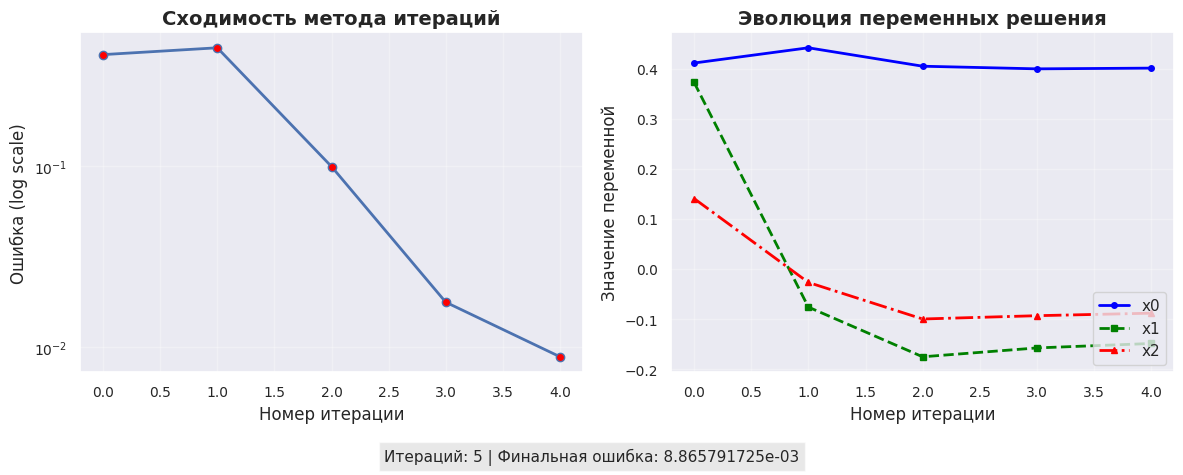

In [128]:
def plot_convergence_analysis():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # график ошибки по итерациям (логарифмическая шкала)
    iterations = list(errors.keys())
    error_values = list(errors.values())
    
    ax1.semilogy(iterations, error_values, 'b-o', linewidth=2, markersize=6, markerfacecolor='red')
    ax1.set_xlabel('Номер итерации', fontsize=12)
    ax1.set_ylabel('Ошибка (log scale)', fontsize=12)
    ax1.set_title('Сходимость метода итераций', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    
    # график изменения переменных
    colors = ['blue', 'green', 'red']
    line_styles = ['-', '--', '-.']
    
    for i, (var_name, values) in enumerate(solutions_history.items()):
        ax2.plot(range(len(values)), values, 
                color=colors[i], 
                linestyle=line_styles[i], 
                linewidth=2, 
                marker='o' if i == 0 else 's' if i == 1 else '^',
                markersize=4,
                label=var_name)
    
    ax2.set_xlabel('Номер итерации', fontsize=12)
    ax2.set_ylabel('Значение переменной', fontsize=12)
    ax2.set_title('Эволюция переменных решения', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11, loc='lower right')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    if error_values:
        final_error = error_values[-1]
        convergence_rate = error_values[-1] / error_values[-2] if len(error_values) > 1 else 0
        plt.figtext(0.5, 0.01, 
                   f"Итераций: {len(errors)} | Финальная ошибка: {final_error:.9e}", 
                   ha='center', fontsize=11, bbox=dict(facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

solution = iteration_method(A, B, eps)
print(f"\nРезультат: x0={solution[0]:.6f}, x1={solution[1]:.6f}, x2={solution[2]:.6f}")
print(f"Количество итераций: {len(errors)}")
print(f"Финальная ошибка: {list(errors.values())[-1]:.2e}")
plot_convergence_analysis()